In [1]:
library(readr)
property <- read_csv("C:/Users/tshan/Desktop/property.csv")

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_integer(),
  year = col_integer(),
  price = col_double(),
  latitude = col_double(),
  longitude = col_double()
)
See spec(...) for full column specifications.


In [2]:
head(property)

X1,year,input_string,sale_date,address,postal_code,ppr_county,price,not_full_market_price,vat_exclusive,...,accuracy,latitude,longitude,postcode,type,geo_county,electoral_district,electoral_district_id,region,small_area
1,2012,"' St. Martins', Ightermurragh, Ladysbridge,Cork,Ireland",18/09/2012,"' St. Martins', Ightermurragh, Ladysbridge",NA,Cork,118000,No,No,...,ROOFTOP,51.89872,-8.027057,NA,premise,Cork,Ightermurragh,18257,South-West (IE),47173003
2,2012,"' The Stone House', Ballyglass Upper, Tipperary,Tipperary,Ireland",16/01/2012,"' The Stone House', Ballyglass Upper, Tipperary",NA,Tipperary,210000,No,No,...,ROOFTOP,52.43867,-8.171166,NA,premise,South Tipperary,Tipperary Rural,23177,South-East (IE),217165003
3,2012,"'AVONDALE', MORRISTOWNBILLER, NEWBRIDGE,Kildare,Ireland",23/01/2012,"'AVONDALE', MORRISTOWNBILLER, NEWBRIDGE",NA,Kildare,220000,No,No,...,ROOFTOP,53.17828,-6.815277,NA,premise,Kildare,Morristownbiller,6078,Mid-East,87069011
4,2012,"'Abhann', 61 Dublin Road, Swords,Dublin,Ireland",12/12/2012,"'Abhann', 61 Dublin Road, Swords",NA,Dublin,496089,No,No,...,ROOFTOP,53.45102,-6.225203,K67 R6W8,street_address,Fingal,Swords Village,4040,Dublin,267135002
5,2012,"'Annesgrove', 33 Glasheen road,Cork,Ireland",25/01/2012,"'Annesgrove', 33 Glasheen road",NA,Cork,240000,No,No,...,ROOFTOP,51.88485,-8.505120,T12 P6C5,street_address,Cork City,Glasheen A,17030,South-West (IE),48031003
6,2012,"'Ardan', Aghowle, Ashford,Wicklow,Ireland",30/03/2012,"'Ardan', Aghowle, Ashford",NA,Wicklow,150000,No,No,...,APPROXIMATE,53.01079,-6.108289,NA,"locality,political",Wicklow,Glenealy,15054,Mid-East,257038008


In [1]:
dim(property)
summary(property$price)

ERROR: Error in eval(expr, envir, enclos): object 'property' not found


In [8]:
library(ggplot2)
library(dplyr)
install.packages("tidyverse")
library(DT)

ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


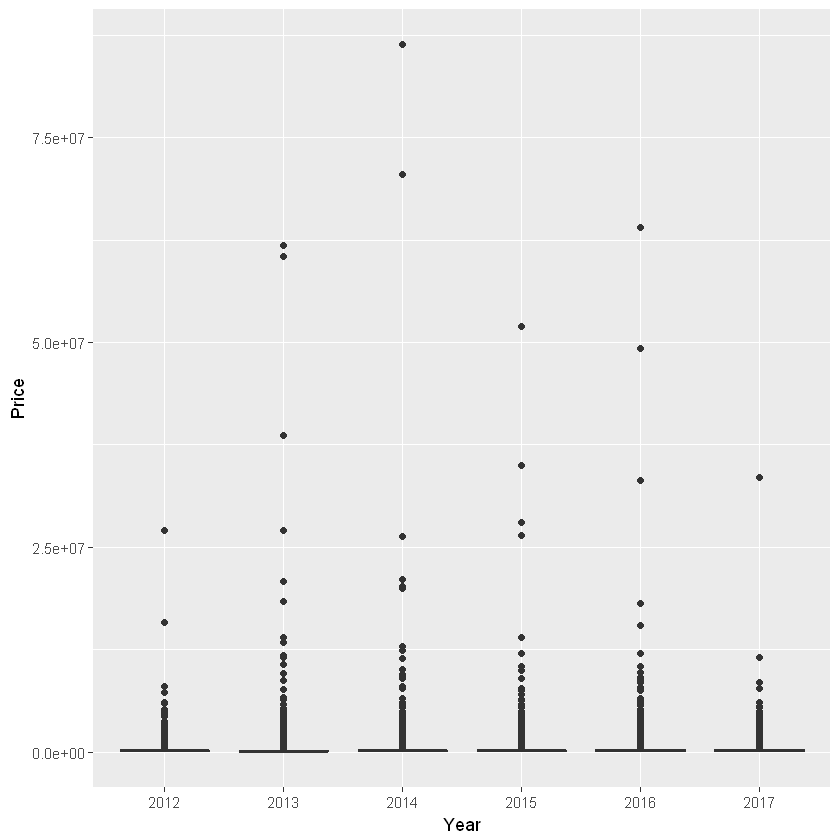

In [9]:
summary_yr <- aggregate(property$price,list(property$year),summary)
sumyr <- data.frame(summary_yr)
property$year <- as.factor(property$year)
ggplot(property,aes(x=property$year,y=property$price))+
  geom_boxplot()+xlab("Year")+ylab("Price")


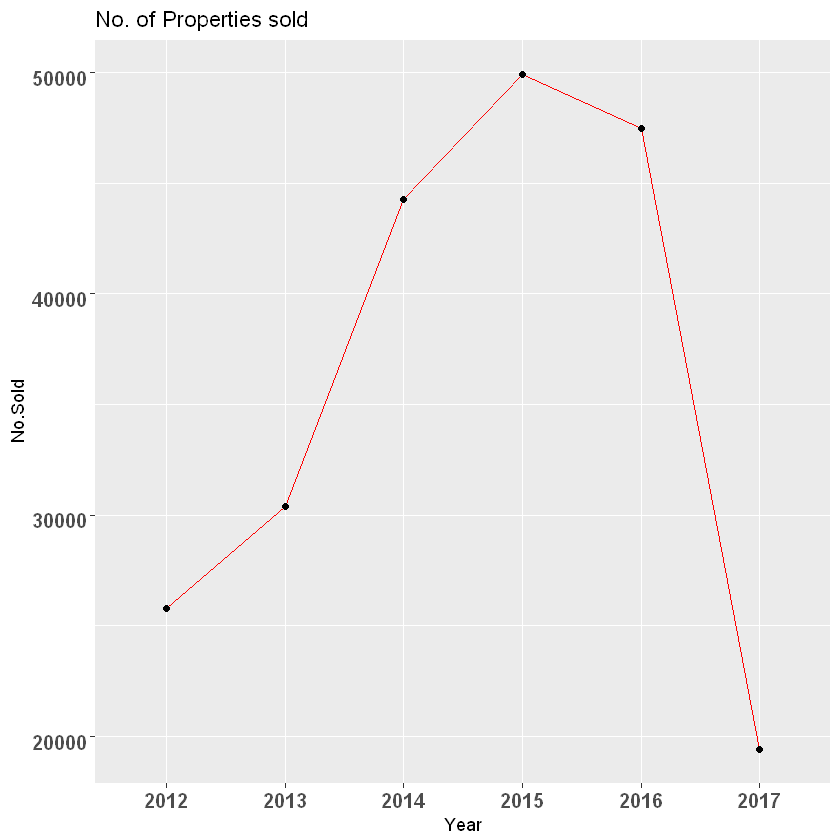

In [11]:
ggplot(tabyear,aes(x=tabyear$Year,y=tabyear$No.Sold,group = 1))+
  geom_line(colour = "red")+
  geom_point()+ylab("No.Sold")+xlab("Year")+ggtitle("No. of Properties sold")+
  theme(axis.text.y  = element_text(vjust=0.8, size=12,face="bold"))+
  theme(axis.text.x  = element_text(vjust=0.8, size=12,face="bold"))


In [13]:
cc <- table(property$ppr_county)
ccd <- data.frame(cc)
colnames(ccd) <- c("County"," No.Sold"," % Market")
ccd$pct <- ccd$`Props Sold`/sum(ccd$`Props Sold`)
ccd$pct <-round(ccd$pct,2)
ccd$pct <- percent(ccd$pct)

ERROR: Error in `colnames<-`(`*tmp*`, value = c("County", " No.Sold", " % Market": 'names' attribute [3] must be the same length as the vector [2]


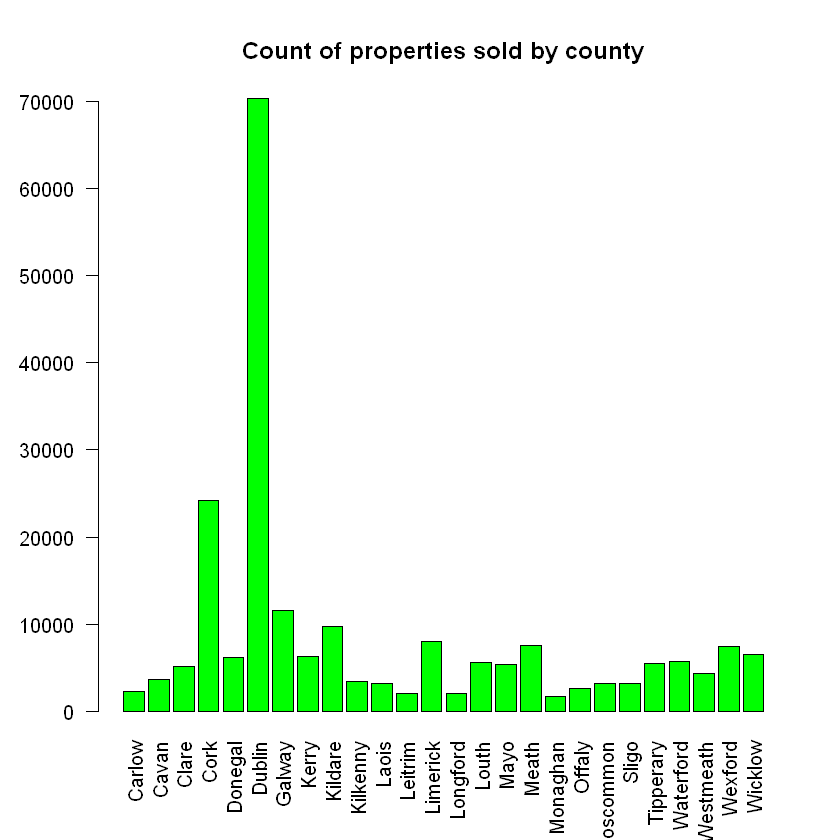

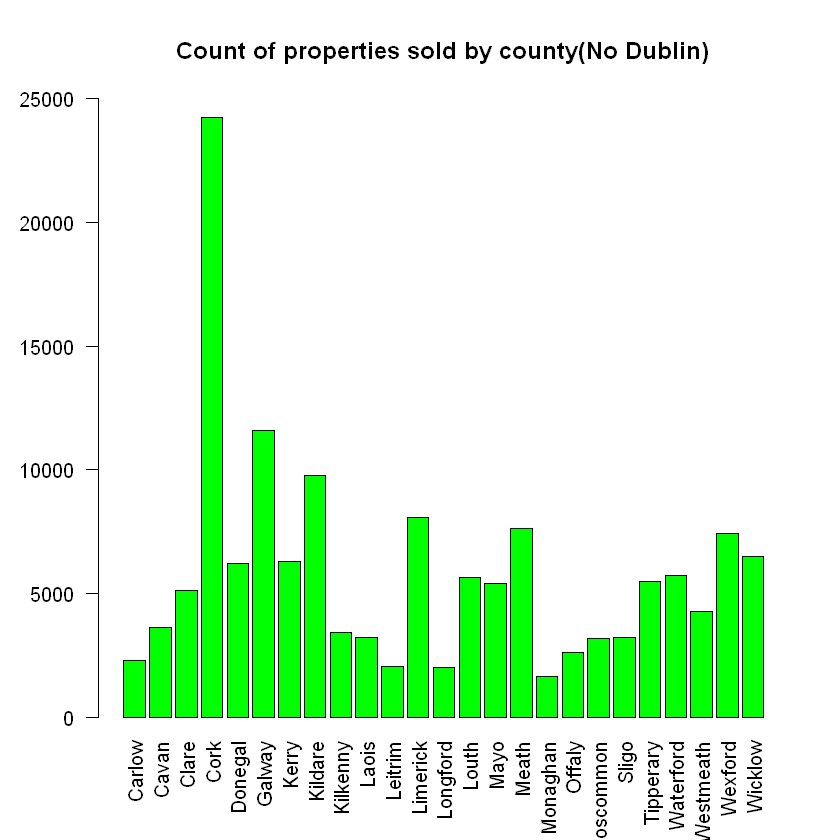

In [14]:
par(mfrow=c(1,1))
barplot(cc,las =2,col='green',
     main = "Count of properties sold by county")
nodublin = subset(property,ppr_county != 'Dublin')
nodublin1 <- table(nodublin$ppr_county)
barplot(nodublin1,las =2,col='green',xlab = "",
     main = "Count of properties sold by county(No Dublin)",ylim=c(0,25000))

In [15]:
avg_price <- aggregate(property$price, list(property$year),median)
colnames(avg_price) <- c("Year","Price")

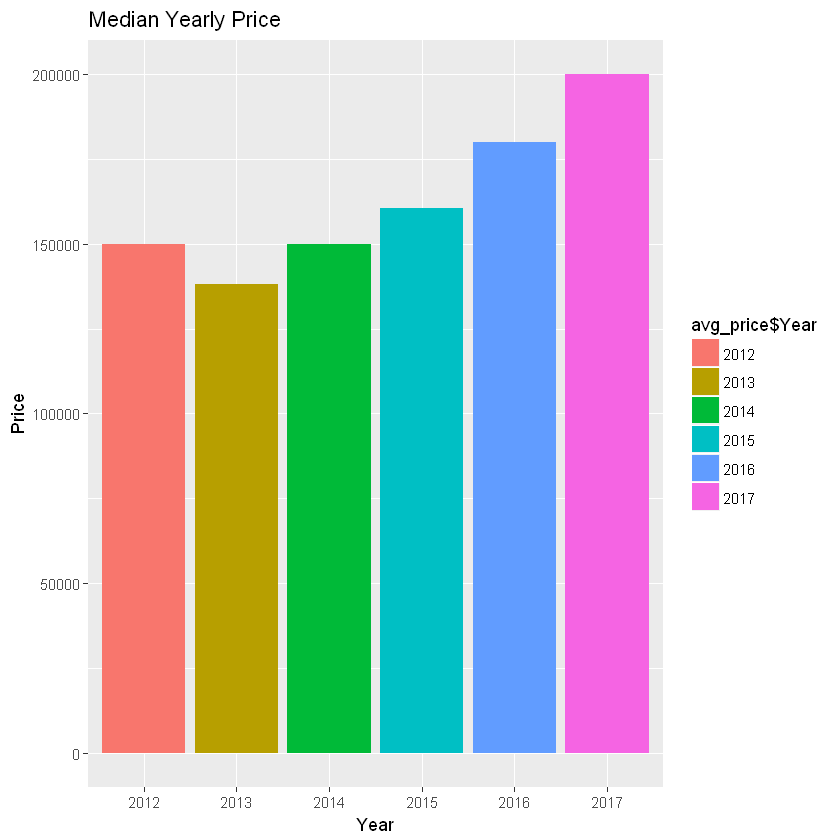

In [16]:
ggplot(avg_price,aes(x=avg_price$Year,y=avg_price$Price,fill = avg_price$Year))+
  geom_bar(stat ="identity")+
  xlab("Year")+ylab("Price")+ggtitle("Median Yearly Price ")

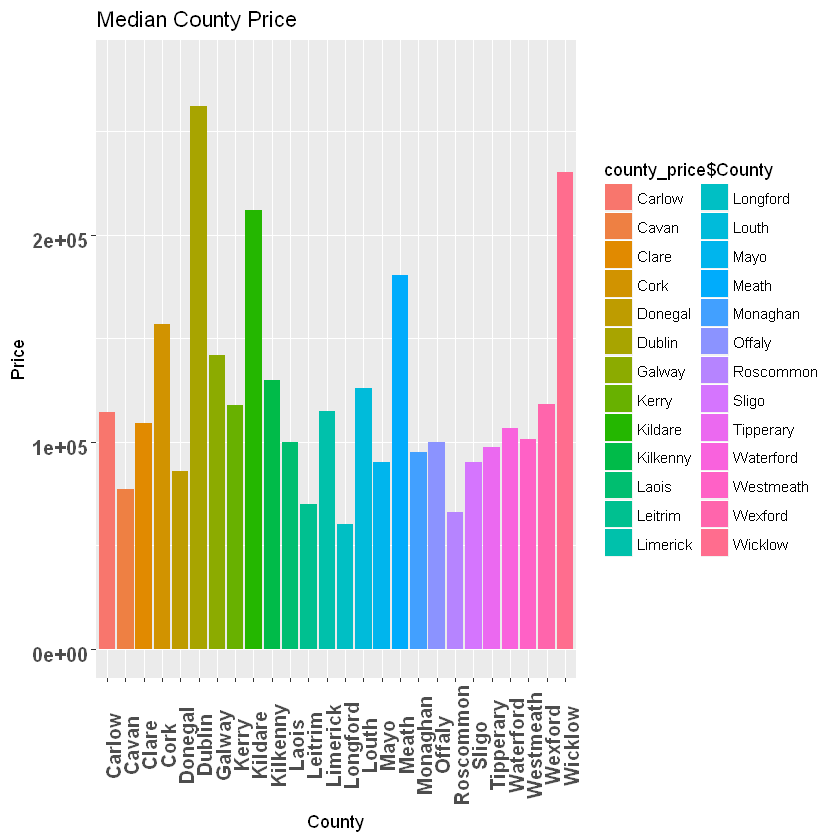

In [17]:
county_price <- aggregate(property$price,list(property$ppr_county),median)
colnames(county_price)<- c("County","Price")


ggplot(county_price, aes(county_price$County, 
                         county_price$Price, fill = county_price$County))+
  geom_bar(stat = 'identity')+
theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=10))+
  labs(title ="Median County Price")+ylab("Price")+xlab("County")+
  ylim(0,280000)+
  theme(axis.text.y  = element_text(vjust=0.8, size=12,face="bold"))+
  theme(axis.text.x  = element_text(vjust=0.8, size=12,face="bold"))


In [18]:
county_priceyr <- aggregate.data.frame(property$price,list(property$ppr_county,property$year),median)

In [19]:
county_priceyr

Group.1,Group.2,x
Carlow,2012,100000.00
Cavan,2012,85000.00
Clare,2012,114250.00
Cork,2012,152500.00
Donegal,2012,90000.00
Dublin,2012,203000.00
Galway,2012,145000.00
Kerry,2012,127000.00
Kildare,2012,170000.00
Kilkenny,2012,120000.00


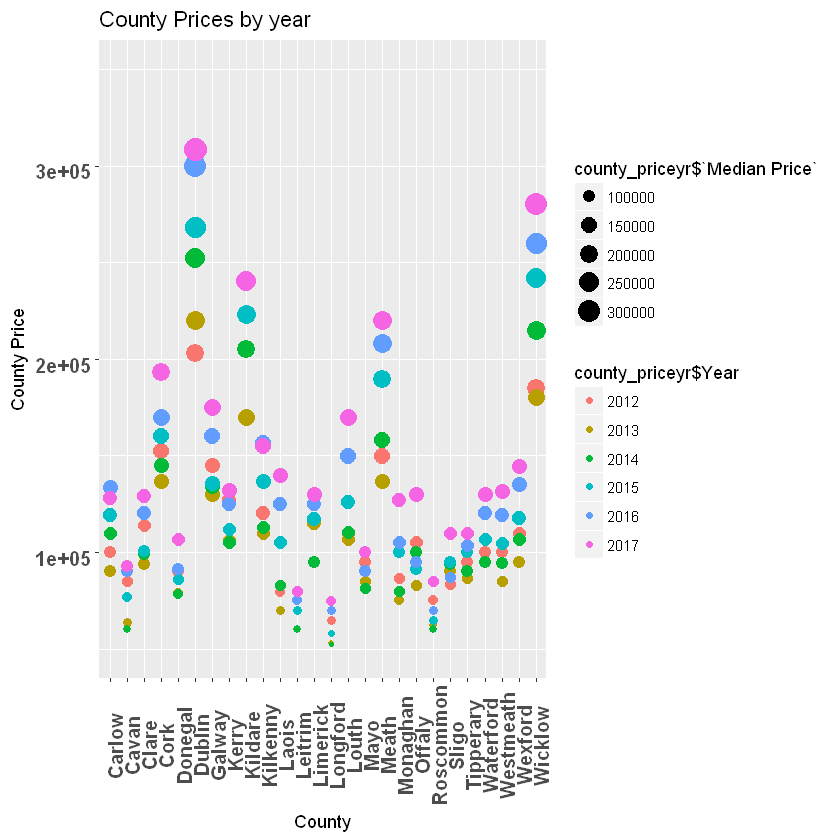

In [20]:
colnames(county_priceyr) <- c("County","Year","Median Price")
qplot(x = county_priceyr$County, y = county_priceyr$`Median Price`, 
      data = county_priceyr, geom = "point",
      colour = county_priceyr$Year,size = county_priceyr$`Median Price`)+
  theme(axis.text.x  = element_text(angle=90, vjust=0.8, size=12,face="bold"))+
  theme(axis.text.y  = element_text(vjust=0.8, size=12,face="bold"))+
  xlab("County")+ylab("County Price")+ggtitle("County Prices by year")+
  ylim(50000,350000)

Group.1,x
01/01/2012,169525
01/01/2013,88000
01/01/2016,122875
01/01/2017,271800
01/02/2012,160000
01/02/2013,150000


'data.frame':	1902 obs. of  2 variables:
 $ Group.1: chr  "01/01/2012" "01/01/2013" "01/01/2016" "01/01/2017" ...
 $ x      : num  169525 88000 122875 271800 160000 ...


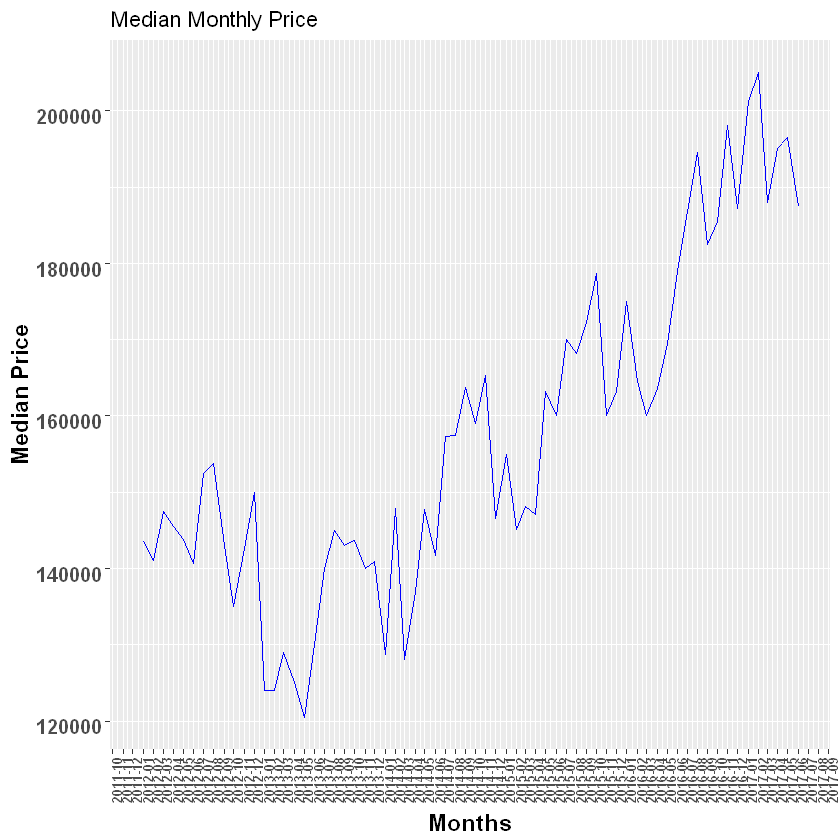

In [22]:
library(scales)
monthly <- aggregate.data.frame(property$price,list(property$date),median)
head(monthly)
str(monthly)
monthly$date <- as.Date(monthly$Group.1, "%d/%m/%Y")
monthly$Month <- as.Date(cut(monthly$date,
                         breaks = "month"))

  
ggplot(data = monthly,
       aes(monthly$Month,monthly$x)) +
  stat_summary(fun.y = median,geom = "line",colour ="Blue")+
  xlab("Months")+ylab("Median Price")+labs(title = "Median Monthly Price")+
  theme(axis.title=element_text(size=14,face="bold"))+
  theme(axis.text = element_text(vjust=0.8, size=12,face="bold"))+
  theme(axis.text.x = element_text(angle=90,vjust=0.8, size=8,face="bold"))+
    scale_x_date(
    labels = date_format("%Y-%m"),
    date_breaks = "1 month")
 
  

In [23]:
reg <-aggregate.data.frame(property$price,list(property$region),median)
colnames(reg)<-c('Region','Median price')

[1] 160000

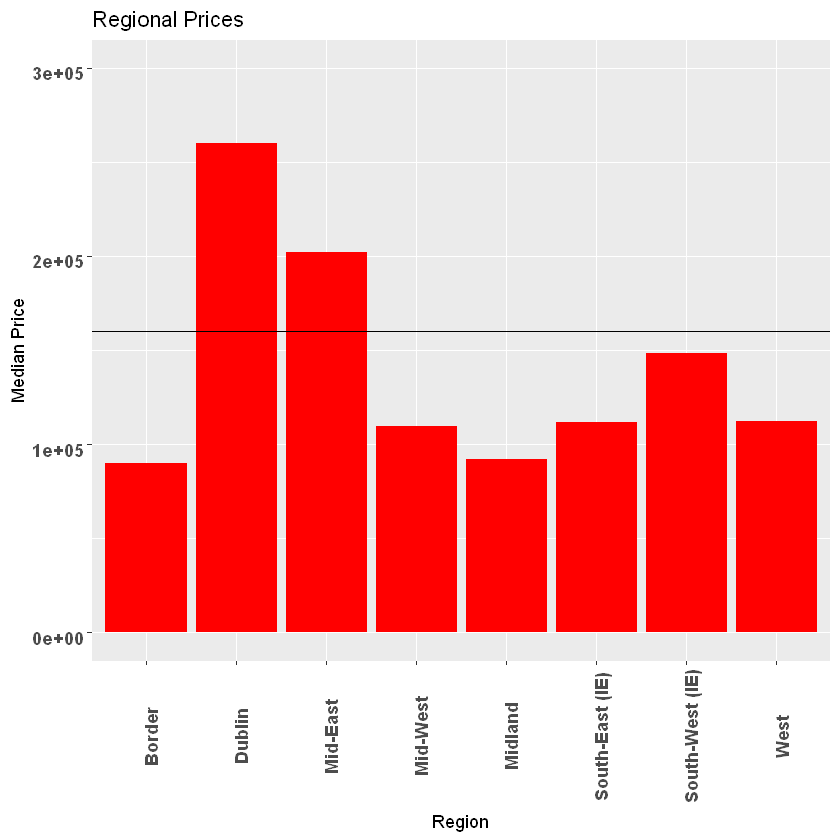

In [24]:
ggplot(reg, aes(x=reg$Region,y=reg$`Median price`,cex.lab =0.1))+
geom_bar(stat="identity",fill ='red')+
xlab("Region")+ylab("Median Price")+geom_hline(yintercept=160000)+
theme(axis.text.x = element_text(angle=90, vjust=0.8, size=11,face = "bold"))+
theme(axis.text.y = element_text(vjust=0.8, size=11,face = "bold"))+ 
  ylim(0,300000)+ggtitle("Regional Prices")
median(property$price)

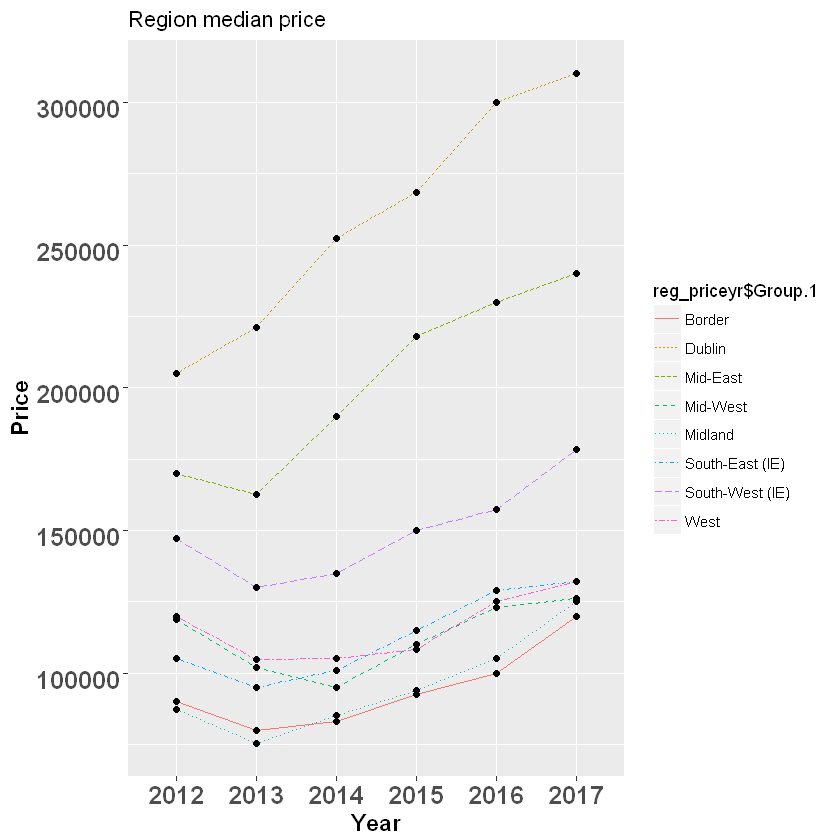

In [26]:
reg_priceyr <- aggregate(property$price,list(property$region,property$year),median)
ggplot(reg_priceyr, aes(x=reg_priceyr$Group.2, y=reg_priceyr$x, group=reg_priceyr$Group.1)) +
  geom_line(aes(linetype=reg_priceyr$Group.1, color = reg_priceyr$Group.1))+
  geom_point()+
  labs(x="Year",y="Price",title = "Region median price ",colours = "Region")+
theme(axis.text = element_text(vjust=0.8, size=15,face="bold"))+
  theme(axis.title=element_text(size=14,face="bold"))